In [2]:
##Importing libraries
import numpy as np
import pandas as pd
from keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [3]:
##Path
path_of_train_data='Documents/DeepLearning/Kaggle/dataset/seg_train/seg_train'
path_of_test_data='Documents/DeepLearning/Kaggle/dataset/seg_test/seg_test'

In [4]:
## Preprocessing training data
train=image.ImageDataGenerator(rescale=1./255,shear_range=0.2,horizontal_flip=True,zoom_range=0.25)
training_data=train.flow_from_directory(path_of_train_data,target_size=(64,64),batch_size=32,class_mode='categorical')


Found 14034 images belonging to 6 classes.


In [5]:
## Preprocessing test data
test=image.ImageDataGenerator(rescale=1./255)
testing_data=test.flow_from_directory(path_of_test_data,target_size=(64,64),batch_size=32,class_mode='categorical')

Found 3000 images belonging to 6 classes.


In [6]:
##Build CNN model
model=Sequential()
model.add(Conv2D(filters=64,kernel_size=3,activation='relu',input_shape=[64,64,3]))
model.add(MaxPool2D(pool_size=2,strides=2))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

model.add(Flatten())

model.add(Dense(units=180,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=180,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=6,activation='softmax'))

In [7]:
##Compilation
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [8]:
##Early stopping
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1)

In [10]:
##Fit the model
model.fit(x=training_data,validation_data=testing_data,epochs=20,verbose=1,callbacks=[early_stop])

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 439 steps, validate for 94 steps
Epoch 1/20
439/439 [==============================] - 79s 179ms/step - loss: 0.5760 - accuracy: 0.7969 - val_loss: 0.5815 - val_accuracy: 0.7887
Epoch 2/20
439/439 [==============================] - 84s 191ms/step - loss: 0.5606 - accuracy: 0.8028 - val_loss: 0.5777 - val_accuracy: 0.7990
Epoch 3/20
439/439 [==============================] - 84s 192ms/step - loss: 0.5282 - accuracy: 0.8159 - val_loss: 0.5346 - val_accuracy: 0.8087
Epoch 4/20
439/439 [==============================] - 85s 195ms/step - loss: 0.5061 - accuracy: 0.8223 - val_loss: 0.4969 - val_accuracy: 0.8300
Epoch 5/20
439/439 [==============================] - 86s 197ms/step - loss: 0.4824 - accuracy: 0.8298 - val_loss: 0.4758 - val_accuracy: 0.8250
Epoch 6/20
439/439 [==============================] - 88s 200ms/step - loss: 0.4771 - accuracy: 0.8303 - val_loss: 0.4659 - val_accuracy: 0.8310
Epoch 7/20
439/439 [=================

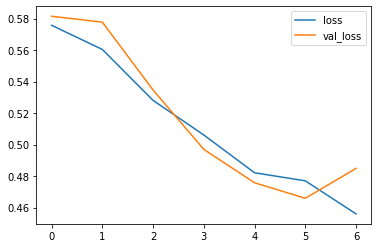

In [11]:
##Plot
loss_value=pd.DataFrame(model.history.history)
loss_value[['loss','val_loss']].plot()

In [45]:
##Loading test image
test_image=image.load_img('Documents/DeepLearning/Kaggle/dataset/seg_pred/seg_pred/5571.jpg',target_size=(64,64))
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)

In [46]:
##Predicting the image
prediction=model.predict(test_image)

In [47]:
##Identifying the class indices
if prediction[0][0] == 1:
    output='Building'
elif prediction[0][1] == 1:
    output='Forest'
elif prediction[0][2] == 1:
    output='Glacier'
elif prediction[0][3] == 1:
    output='Mountain'
elif prediction[0][4] == 1:
    output='Sea'
else:
    output='Street'

In [48]:
##Printing the output
print(output)

Street
